# **Movie Genres Classification**
Predicting the genre of movie from just 1000 characters of the script.

In [6]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [7]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/NLP/kaggle_movie_train.csv')

# **Taking a look at the dataset**

In [8]:
df.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [9]:
df.shape

(22579, 3)

In [10]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [11]:
df

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
...,...,...,...
22574,28161,n in the world to decide what I'm going to do ...,drama
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,28165,....with marked skill and dexterity . LANA wry...,action


In [ ]:
help(df)

In [ ]:
dir(df)

**Visualization**

In [14]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

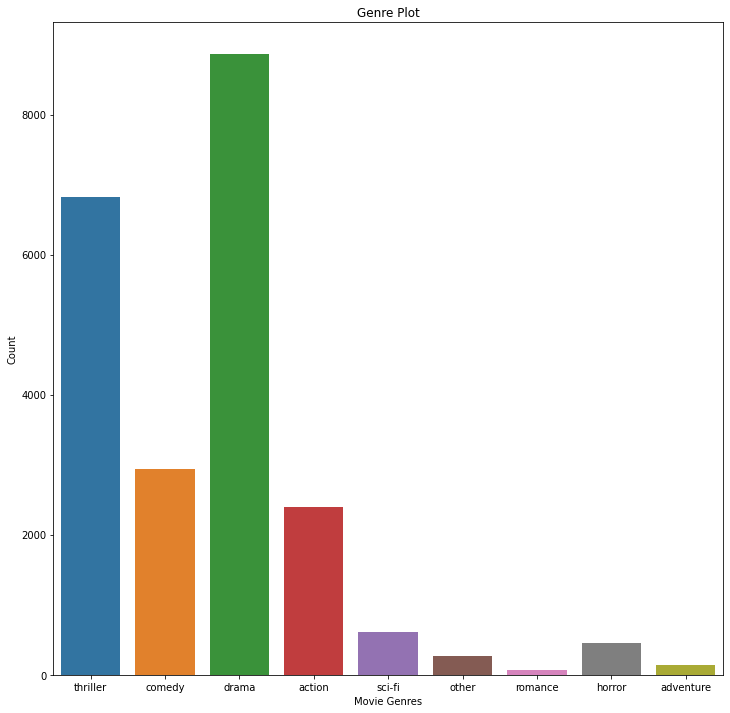

In [15]:
# Visualizing the count of 'genre' column from the dataset
plt.figure(figsize=(12, 12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

In [16]:
df['genre']

0        thriller
1          comedy
2           drama
3        thriller
4           drama
           ...   
22574       drama
22575       drama
22576    thriller
22577      action
22578      comedy
Name: genre, Length: 22579, dtype: object

In [17]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [18]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


# **Data Cleaning and Preprocessing**

In [19]:
# Finding unique genres
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [20]:
set(df['genre'])

{'action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller'}

In [21]:
# Mapping the genres to values
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy': 3, 'drama': 4, 'horror': 5, 'romance': 6, 'sci-fi': 7, 'thriller': 8}
df['genre_vals'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre,genre_vals
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller,8
1,2,"t, summa cum laude and all. And I'm about to l...",comedy,3
2,3,"up Come, I have a surprise.... She takes him ...",drama,4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller,8
4,5,"nd dismounts, just as the other children reach...",drama,4
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller,8
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama,4
8,10,"Memphis goes back into the garage, Budgy cack...",thriller,8
9,11,e reels as the world spins. Sweat pours off hi...,action,1


In [22]:
genre_mapper

{'action': 1,
 'adventure': 2,
 'comedy': 3,
 'drama': 4,
 'horror': 5,
 'other': 0,
 'romance': 6,
 'sci-fi': 7,
 'thriller': 8}

In [23]:
# Finding any NaN values
df.isna().any()

id            False
text          False
genre         False
genre_vals    False
dtype: bool

In [24]:
df.drop('id', axis=1, inplace=True)

In [25]:
df.columns

Index(['text', 'genre', 'genre_vals'], dtype='object')

In [26]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
df.shape

(22579, 3)

In [28]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

    # Cleaning special character from the dialog/script
    dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

    # Converting the entire dialog/script into lower case
    dialog = dialog.lower()

    # Tokenizing the dialog/script by words
    words = dialog.split()

    # Removing the stop words
    dialog_words = [w for w in words if w not in set(stopwords.words('english'))]

    # Stemming tthe words
    words = [ps.stem(w) for w in dialog_words]

    # Joining the stemmed words
    dialog = ' '.join(words)

    # Creating a corpus
    corpus.append(dialog)

In [36]:
df.columns

Index(['text', 'genre', 'genre_vals'], dtype='object')

In [37]:
df['text'][0]

"eady dead, maybe even wishing he was. INT. 2ND FLOOR HALLWAY THREE NIGHT The Orderly leads Liza to a door. ORDERLY In here. White guy in his 30s. He opens the door and they step into... ROOM THREE There's a white guy in his mid 30s. He looks up. Wild. Straight jacketed. Not Jerry. Liza's reached the end of her rope. She just shakes her head. INT. DECREPIT HOSPITAL ROOM NIGHT Balled up. Fetal. Not really all there. Head pressed to the cement, he tries to sing to himself. JERRY Blue moon... Blue moon... INT. 2ND FLOOR HALLWAY THREE NIGHT Liza just stands there, leaning on a rail on the wall. The Orderly isn't sure what's going on, but he knows it's bad. ORDERLY You okay? Liza starts down the hall with the Orderly following. ORDERLY We got some new patients last week. You want to see them? Liza waves them off. It's hopeless. She stops at a chicken wired window at the end of the hall, looks out. Light's about to break and Jerry's out there somewhere. ORDERLY Look, I gotta get back to work

In [39]:
corpus[:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [41]:
df[df['genre_vals']==4].index

Int64Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,
               16,
            ...
            22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574,
            22575],
           dtype='int64', length=8873)

In [49]:
df['genre_vals']==4

0        False
1        False
2         True
3        False
4         True
         ...  
22574     True
22575     True
22576    False
22577    False
22578    False
Name: genre_vals, Length: 22579, dtype: bool

In [43]:
drama_words = []
for i in list(df[df['genre_vals']==4].index):
    drama_words.append(corpus[i])
action_words = []
for i in list(df[df['genre_vals']==1].index):
    action_words.append(corpus[i])
comedy_words = []
for i in list(df[df['genre_vals']==3].index):
    comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
    drama += drama_words[i]
    action += action_words[i]
    comedy += comedy_words[i]

In [56]:
drama_words[0]

'come surpris take hand lead hallway salvator look feel pang seem smaller age wither bodi slightli stoop hair gather knot back head must tire want rest time funer salvator interrupt mamma take hour air know maria smile iron tell year salvator get messag feel guilti think seem incred never come maria open door step asid let son whisper put thing go go salvator lake step flabbergast sight old room perfectli reconstruct preserv look like museum museum past despit bed cloth cupboard book shelv perfectli clear one ever live'

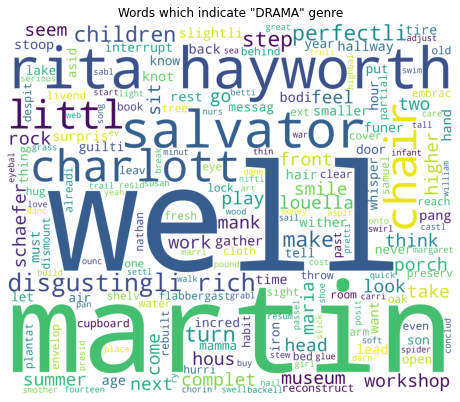

In [47]:
# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title('Words which indicate "DRAMA" genre')
plt.show()

In [48]:
drama

'come surpris take hand lead hallway salvator look feel pang seem smaller age wither bodi slightli stoop hair gather knot back head must tire want rest time funer salvator interrupt mamma take hour air know maria smile iron tell year salvator get messag feel guilti think seem incred never come maria open door step asid let son whisper put thing go go salvator lake step flabbergast sight old room perfectli reconstruct preserv look like museum museum past despit bed cloth cupboard book shelv perfectli clear one ever livend dismount children reach throw arm embrac charlott hurri behind martin lock eye envelop hug children ext fresh water plantat even summer oak tree cover leav martin hous partial rebuilt habit workshop alreadi complet martin children nathan samuel margaret william play tall grass front hous two great dane charlott sit front porch nurs infant martin walk workshop trail susan carri complet rock chair chair work art thin light spider web perfectli turn wood nail glue step on

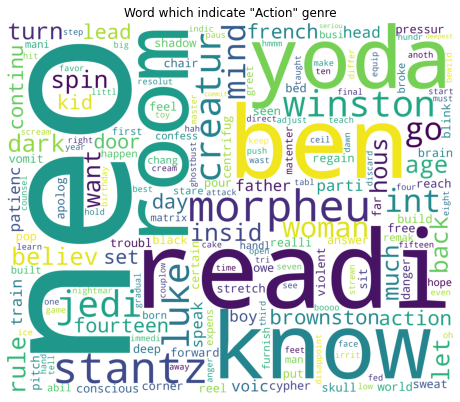

In [50]:
# Creating wordcloud for action genre
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title('Word which indicate "Action" genre')
plt.show()

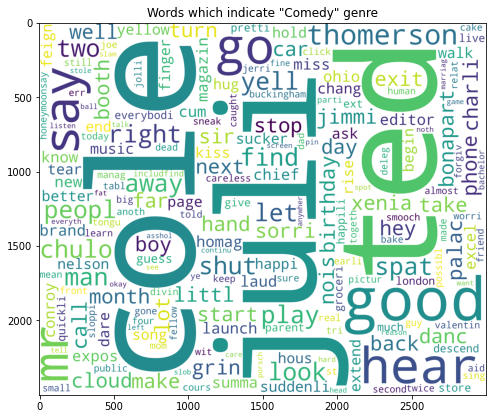

In [52]:
# Creating wordcloud for comedy genre
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud3)
plt.axis=('off')
plt.title('Words which indicate "Comedy" genre')
plt.show()

In [57]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [58]:
y = df['genre_vals'].values

# **Model Building**

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print(f'X_train size: {X_train.shape}, X_test size: {X_test.shape}')

X_train size: (18063, 10000), X_test size: (4516, 10000)


***Multinomial Naive Bayes***

In [62]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [63]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [65]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print(f'accuracy score is: {round(score1 * 100, 2)}%')

accuracy score is: 89.57%


In [66]:
# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [67]:
nb_cm

array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   3,   42,    1,   38, 1607,   21,    1,   11,  103],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    2,    7,    1,    0,  112,    8],
       [   0,   14,    0,   21,   77,   11,    0,   22, 1173]])

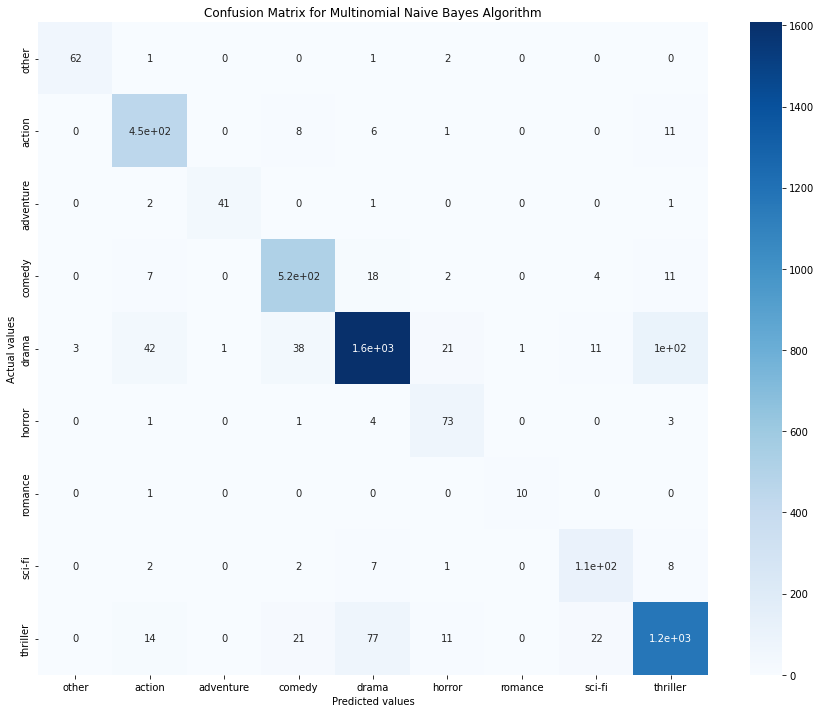

In [68]:
# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels =  ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm,annot=True, cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [70]:
# Hyperparameters tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1, 1.1, 0.1):
    t_cl = MultinomialNB(alpha=i)
    t_cl.fit(X_train, y_train)
    t_y_pred = t_cl.predict(X_test)
    s = accuracy_score(y_test, t_y_pred)
    print(f'accuracy score for alpha={round(i, 1)} is: {round(s*100,2)}')
    if s > best_accuracy:
        best_accuracy = s
        alpha_val = i
print(f'The best accuracy is {round(best_accuracy*100,2)}% with alpha value as {round(alpha_val, 1)}')

accuracy score for alpha=0.1 is: 91.34
accuracy score for alpha=0.2 is: 91.08
accuracy score for alpha=0.3 is: 90.85
accuracy score for alpha=0.4 is: 90.59
accuracy score for alpha=0.5 is: 90.26
accuracy score for alpha=0.6 is: 90.12
accuracy score for alpha=0.7 is: 90.04
accuracy score for alpha=0.8 is: 89.95
accuracy score for alpha=0.9 is: 89.79
accuracy score for alpha=1.0 is: 89.57
The best accuracy is 91.34% with alpha value as 0.1


In [71]:
c = MultinomialNB(alpha=0.1)
c.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

# **Predictions**

In [72]:
def genre_prediction(s_s):
    s_s = re.sub(pattern='[^a-zA-Z]', repl=' ', string = s_s)
    s_s = s_s.lower()
    s_s_ws = s_s.split()
    s_s_ws = [w for w in s_s_ws if not w in set(stopwords.words('english'))]
    ps = PorterStemmer()
    f_s = [ps.stem(w) for w in s_s_ws]
    f_s = ' '.join(f_s)
    
    t = cv.transform([f_s]).toarray()
    return c.predict(t)[0]

In [73]:
from random import randint
test = pd.read_csv('/content/drive/MyDrive/NLP/kaggle_movie_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [74]:
test.shape

(5589, 2)

In [75]:
test.head(10)

,id,text
0,1,glances at her. BOOK Maybe I ought to learn t...
1,8,hout breaking stride. Tatiana sees her and can...
2,13,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,24,take myself. BRANDON How bad is the other thi...
4,38,"her body to shield his own. KAY Freeze it, Bug..."
5,40,im from ear to ear. Ya want me to make a state...
6,53,"BEN We need to help Reed Sue shakes her head,..."
7,55,slowly. At the entrance to the alley stands a ...
8,65,edge of the field. Neil steps closer. THE TOMB...
9,66,"special, take ya in the kitchen and suck your ..."


In [77]:
test.drop('id', axis=1, inplace=True)
test.head(10)

KeyError: ignored

In [78]:
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


# **Running a few examples**

In [84]:
for _ in range(10):
    row = randint(0, test.shape[0]-1)
    s_s = test.text[row]

    print(f'Script: {s_s}')
    value = genre_prediction(s_s)
    print(f'Precdiction: {list(genre_mapper.keys())[value]}')

Script: nd it. He's a dead man, but the worst part is not knowing where Electra is. Was he deserted? Is she in trouble? In another second, it won't matter. INT. ROOM 302 DAY About to pull the trigger, Bain hesitates... BAIN'S POV THROUGH RIFLE SCOPE He sees the mic in Rath's ear, the cord snaking under his shirt. ROOM 302 Bain frowns, then sniffs the air. There's something strangely familiar in it. BAIN Jasmine. Bain whips a look back over his shoulder, sees Rath's .22, Electra who practically shrugs in apology. ELECTRA Howdy... The .22 SILENCER kisses the air. Bain's shoulder erupts red. EXT. PLAZA COLON DAY Pigeons take wing as Rath sees the RIFLE twist up, FIRE wildly into the sky. A beat and Rath dashes forward. INT. ROOM 302 DAY The rifle dropped, Bain grabs his bag and charges for the wall. Electra FIRES TWICE more, misses twice as Bain crashes through the lathing into... ROOM 301 Stumbling blind, he falls. The floor opens beneath him to let him pass. EXT. PLAZA COLON CAFE DAY Ra

In [83]:
test.shape[0]-1

5588